<a href="https://colab.research.google.com/github/newmantic/FDM/blob/main/FDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

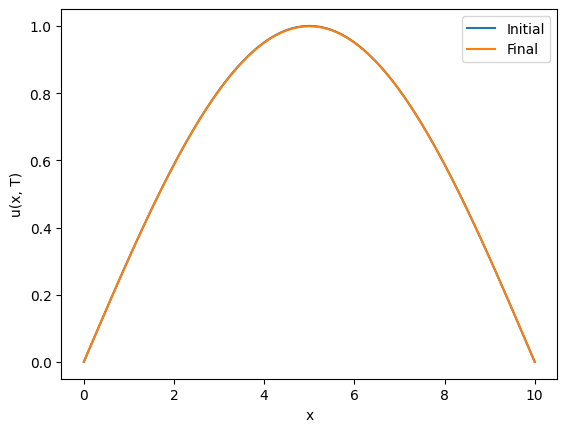

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def heat_equation_explicit(dx, dt, L, T, alpha, u_initial):
    nx = int(L / dx)
    nt = int(T / dt)

    u = np.zeros((nt+1, nx+1))
    u[0, :] = u_initial

    for n in range(0, nt):
        for i in range(1, nx):
            u[n+1, i] = u[n, i] + alpha * dt / dx**2 * (u[n, i+1] - 2*u[n, i] + u[n, i-1])

    return u

# Test the function with a simple initial condition
L = 10  # Length of the rod
T = 1   # Total time
alpha = 0.01  # Diffusivity constant

dx = 0.1  # Spatial step size
dt = 0.001  # Time step size

x = np.linspace(0, L, int(L/dx) + 1)
u_initial = np.sin(np.pi * x / L)  # Initial temperature distribution

u = heat_equation_explicit(dx, dt, L, T, alpha, u_initial)

# Plot the result
plt.plot(x, u[0, :], label='Initial')
plt.plot(x, u[int(T/dt), :], label='Final')
plt.xlabel('x')
plt.ylabel('u(x, T)')
plt.legend()
plt.show()

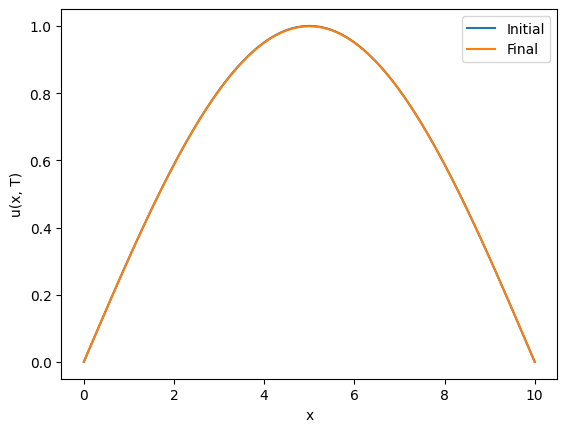

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

def heat_equation_implicit(dx, dt, L, T, alpha, u_initial):
    nx = int(L / dx)
    nt = int(T / dt)

    u = np.zeros((nt+1, nx+1))
    u[0, :] = u_initial

    r = alpha * dt / dx**2

    # Create the matrix A
    A = np.zeros((nx-1, nx-1))
    np.fill_diagonal(A, 1 + 2*r)
    np.fill_diagonal(A[1:], -r)
    np.fill_diagonal(A[:, 1:], -r)

    for n in range(0, nt):
        b = u[n, 1:-1]
        u[n+1, 1:-1] = solve(A, b)

    return u

# Test the function with the same initial condition
L = 10  # Length of the rod
T = 1   # Total time
alpha = 0.01  # Diffusivity constant

dx = 0.1  # Spatial step size
dt = 0.01  # Time step size

x = np.linspace(0, L, int(L/dx) + 1)
u_initial = np.sin(np.pi * x / L)  # Initial temperature distribution

u = heat_equation_implicit(dx, dt, L, T, alpha, u_initial)

# Plot the result
plt.plot(x, u[0, :], label='Initial')
plt.plot(x, u[int(T/dt), :], label='Final')
plt.xlabel('x')
plt.ylabel('u(x, T)')
plt.legend()
plt.show()